In [1]:
%load_ext autoreload
%autoreload 2

In [111]:
from msd.SpeakerDiarizer import SpeakerDiarizer

In [112]:
diarizer = SpeakerDiarizer(name_pipe='dia_dihard')

Using cache found in /Users/jauffret/.cache/torch/hub/pyannote_pyannote-audio_master
Using cache found in /Users/jauffret/.cache/torch/hub/pyannote_pyannote-audio_master
Using cache found in /Users/jauffret/.cache/torch/hub/pyannote_pyannote-audio_master
Using cache found in /Users/jauffret/.cache/torch/hub/pyannote_pyannote-audio_master
/Users/jauffret/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pyannote/audio/embedding/approaches/arcface_loss.py:170: FutureWarning: The 's' parameter is deprecated in favor of 'scale', and will be removed in a future release
  warnings.warn(msg, FutureWarning)
/Users/jauffret/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pyannote/audio/features/pretrained.py:156: UserWarning: Model was trained with 4s chunks and is applied on 2s chunks. This might lead to sub-optimal results.
  warnings.warn(msg)
Using cache found in /Users/jauffret/.cache/torch/hub/pyannote_pyannote-audio_master


In [113]:
path='data/3speakers_distincts-mcflycarlitodupliquetsoudreduce.wav'

In [114]:
diarizer.apply_diarizer(path)

/Users/jauffret/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


In [96]:
diarizer.write_rttm(path_outputs='outputs/test_reduc_noise_meeting.rttm')

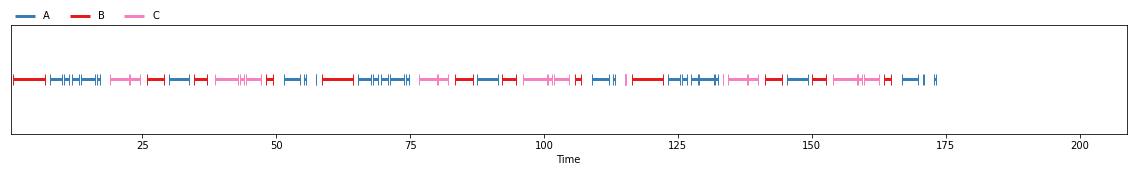

In [115]:
diarizer.diarization

In [9]:
from pyannote.metrics.segmentation import SegmentationPurityCoverageFMeasure

In [10]:
metric_pur_cov = SegmentationPurityCoverageFMeasure()

In [18]:
from pyannote.database.util import load_rttm

In [19]:
reference = load_rttm('outputs/groundtruth/martin2_gt.rttm')

In [25]:
type(reference['121-127105'])

pyannote.core.annotation.Annotation

In [28]:
import torch
torch.hub.list('pyannote/pyannote-audio')

Using cache found in /Users/jauffret/.cache/torch/hub/pyannote_pyannote-audio_master


['dia',
 'dia_ami',
 'dia_dihard',
 'emb',
 'emb_ami',
 'emb_voxceleb',
 'ovl',
 'ovl_ami',
 'ovl_dihard',
 'sad',
 'sad_ami',
 'sad_dihard',
 'scd',
 'scd_ami',
 'scd_dihard']

In [27]:
metric_pur_cov.compute_components(reference['121-127105'],diarizer.diarization)

{'cvg total duration': 197.20731250000003,
 'pty total duration': 197.20731250000003,
 'cvg intersection duration': 130.26049999999998,
 'pty intersection duration': 197.20731250000006}

In [68]:
diarizer.print_outputs()

Speaker "A" speaks between t=11.5s and t=12.5s.
Speaker "A" speaks between t=14.0s and t=108.2s.
Speaker "47" speaks between t=108.2s and t=109.0s.
Speaker "48" speaks between t=109.0s and t=110.7s.
Speaker "A" speaks between t=110.7s and t=144.0s.
Speaker "79" speaks between t=144.0s and t=145.1s.


In [18]:
diarizer.score('outputs/groundtruth/martin2_gt.rttm')

{'correct': 178.08065624999995, 'false alarm': 3.3476249999999856, 'confusion': 7.154906249999961, 'missed detection': 7.514437500000156, 'total': 192.75000000000006, 'diarization error rate': 0.09347324902723786}


In [44]:
from dotenv import load_dotenv

In [45]:
load_dotenv()

True

In [116]:
from msd.SpeakerAward import SpeakerAward

In [117]:
award = SpeakerAward(diarizer)

In [118]:
diarizer.current_filename

'data/3speakers_distincts-mcflycarlitodupliquetsoudreduce.wav'

In [119]:
json_outputs = award.get_json()
json_outputs

[{'speaker': 'B',
  'start': '00:00:00',
  'end': '00:00:06',
  'text': 'Une pensée émue à tous les youtubeur qui sortent aussi leur vidéo les dimanches matins mais qui ne feront pas de vues avant ce soir.'},
 {'speaker': 'A',
  'start': '00:00:07',
  'end': '00:00:10',
  'text': 'Objectif 0 abonné en avant réussi.'},
 {'speaker': 'A',
  'start': '00:00:10',
  'end': '00:00:11',
  'text': 'Gégé à moi même.'},
 {'speaker': 'A',
  'start': '00:00:11',
  'end': '00:00:13',
  'text': "Imaginez s'ils avaient."},
 {'speaker': 'A',
  'start': '00:00:13',
  'end': '00:00:16',
  'text': "S'ils avaient fait, on appelle des gens au hasard au téléphone."},
 {'speaker': 'A',
  'start': '00:00:16',
  'end': '00:00:17',
  'text': 'Avec lui ?'},
 {'speaker': 'C',
  'start': '00:00:18',
  'end': '00:00:22',
  'text': 'Carlito, vous êtes sanguin ? Non ? Emmanuel Macron, non.'},
 {'speaker': 'C',
  'start': '00:00:22',
  'end': '00:00:24',
  'text': 'Carlito, je suis mort.'},
 {'speaker': 'B',
  'start':